**Importing Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from sklearn.svm import LinearSVC as Classifier
from sklearn.model_selection import train_test_split
from pylab import *
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

**Loading Images stored as the numpy array.**

In [0]:
np_X_data_1 = np.load('np_X_data.npy')
np_Y_data_1 = np.load('np_Y_data.npy')

<B>Random Choice Classifier

In [0]:
def random_classifier(X):
    return np.random.choice([0,1])

,Accuracy
count,100.000000
mean,0.500536
std,0.018236
min,0.450402
25%,0.488941
50%,0.502681
75%,0.513405
max,0.541555


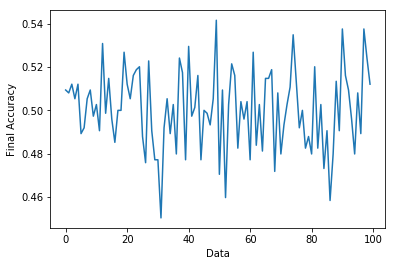

In [7]:
accuracy = [[]]*100
for j in range(100):
    classifications = [[]]*746
    for i in range(746):
        classifications[i] = random_classifier(np_X_data_1[i,:,:])
    accuracy[j] = len(np.where(classifications == np_Y_data_1)[0])/len(classifications)    
plot(accuracy)
xlabel('Data')
ylabel('Final Accuracy')
df = {'Accuracy': accuracy}
table_SVC = pd.DataFrame(data=df)
table_SVC.describe()

**Neural Network**

In [8]:
xception = Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(299,299,3),
    input_tensor=None,
    classes = 1000
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
83689472/83683744 [==============================] - 2s 0us/step


**SGDClassifier, GradientBoostingClassifier, RandomForestClassifier, DeDecisionTreeClassifier and GaussianNB**

In [9]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
set_of_accuracy=[]
set_of_accuracy_sgd=[]
set_of_accuracy_gbc=[]
set_of_accuracy_rfc=[]
set_of_accuracy_gnb=[]
set_of_accuracy_dtc=[]
##############################################List of precision for classifiers########################################################################
set_of_precision = []
set_of_precision_sgd = []
set_of_precision_gbc = []
set_of_precision_rfc = []
set_of_precision_gnb = []
set_of_precision_dtc = []
##############################################List of precision for classifiers########################################################################
set_of_f1 = []
set_of_f1_sgd = []
set_of_f1_gbc = []
set_of_f1_rfc = []
set_of_f1_gnb = []
set_of_f1_dtc = []
############################################Train and testing classifer##############################################################################
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features = xception.predict(X_train)
    test_features = xception.predict(X_test)
################################################Linear SVM#####################################################################
    clf = Classifier(C=20)
    clf.fit(training_features, y_train)
    y_predict = clf.predict(test_features)
    acc = clf.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy.append(acc)  
    set_of_precision.append(precision)
    set_of_f1.append(F1)
###################################################SGD###########################################################################    
    clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    clf_sgd.fit(training_features, y_train)
    y_predict = clf_sgd.predict(test_features)
    acc = clf_sgd.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy_sgd.append(acc)  
    set_of_precision_sgd.append(precision)
    set_of_f1_sgd.append(F1)
###################################################GBD###########################################################################
    clf_gbc = GradientBoostingClassifier()
    clf_gbc.fit(training_features, y_train)
    y_predict_gbc = clf_gbc.predict(test_features)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_gbc = clf_gbc.score(test_features, y_test)
    set_of_accuracy_gbc.append(acc_gbc)  
    set_of_precision_gbc.append(precision)
    set_of_f1_gbc.append(F1)
###################################################RFC###########################################################################
    regr =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    regr.fit(training_features, y_train)
    y_predict_regr = regr.predict(test_features)
    acc_regr = regr.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    set_of_accuracy_rfc.append(acc_regr)
    set_of_precision_rfc.append(precision)
    set_of_f1_rfc.append(F1)
####################################################GNB###########################################################################
    gnb = GaussianNB()
    gnb.fit(training_features, y_train)
    y_predict_gnb = gnb.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_gbn = gnb.score(test_features, y_test)
    set_of_accuracy_gnb.append(acc_gbn)  
    set_of_precision_gnb.append(precision)
    set_of_f1_gnb.append(F1)
#####################################################DTC##########################################################################
    clf_dtc = DecisionTreeClassifier(random_state=0)
    clf_dtc.fit(training_features, y_train)
    y_predict_dtc = clf_dtc.score(test_features, y_test)
    F1 =f1_score(y_test, y_predict, average='weighted')
    precision = precision_score(y_test, y_predict, average='weighted')
    acc_dtc = clf_dtc.score(test_features, y_test)
    set_of_accuracy_dtc.append(acc_dtc)   
    set_of_precision_dtc.append(precision)
    set_of_f1_dtc.append(F1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Linear SVC**

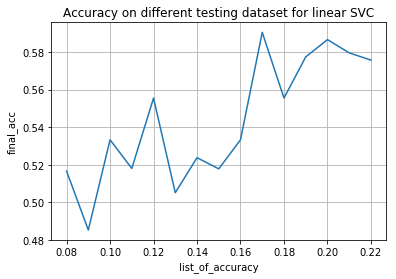

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.543646,0.543998,0.542050
std,0.033105,0.034472,0.034265
min,0.485294,0.482447,0.482932
25%,0.517965,0.516616,0.516691
50%,0.533333,0.537032,0.534332
75%,0.576611,0.577833,0.576951
max,0.590551,0.589926,0.590092


In [10]:
plot(list_of_accuracy,set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for linear SVC')
grid(True)
show()
df = {'Accuracy': set_of_accuracy, 'Precision':set_of_precision, 'F1 Score':set_of_f1}
table_SVC = pd.DataFrame(data=df)
table_SVC.describe()

**Stochastic Gradient Descent**

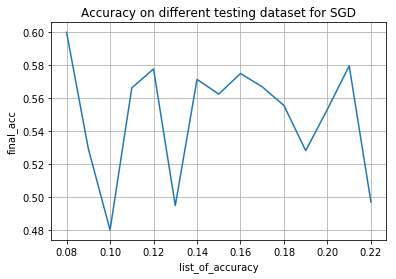

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.549187,0.558099,0.523984
std,0.035484,0.040599,0.053227
min,0.480000,0.450113,0.437868
25%,0.528790,0.551482,0.477664
50%,0.562500,0.575630,0.551442
75%,0.573214,0.577161,0.560187
max,0.600000,0.598682,0.595429


In [11]:
plot(list_of_accuracy,set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
df_sgd = {'Accuracy': set_of_accuracy_sgd, 'Precision':set_of_precision_sgd, 'F1 Score':set_of_f1_sgd}
table_sgd = pd.DataFrame(data=df_sgd)
# table_sgd
table_sgd.describe()

**Gradient Boosting Classifier**

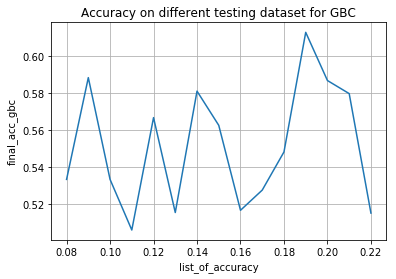

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.551533,0.558099,0.523984
std,0.033256,0.040599,0.053227
min,0.506024,0.450113,0.437868
25%,0.522113,0.551482,0.477664
50%,0.548148,0.575630,0.551442
75%,0.580285,0.577161,0.560187
max,0.612676,0.598682,0.595429


In [12]:
plot(list_of_accuracy,set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc_gbc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
df_gbc = {'Accuracy': set_of_accuracy_gbc,'Precision':set_of_precision_gbc, 'F1 Score':set_of_f1_gbc}
table_gbc = pd.DataFrame(data=df_gbc)
# table_gbc
table_gbc.describe()

**Random Forest Classifier**

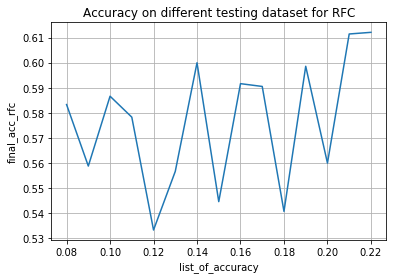

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.576463,0.558099,0.523984
std,0.025699,0.040599,0.053227
min,0.533333,0.450113,0.437868
25%,0.557762,0.551482,0.477664
50%,0.583333,0.575630,0.551442
75%,0.595129,0.577161,0.560187
max,0.612121,0.598682,0.595429


In [13]:
plot(list_of_accuracy,set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc_rfc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
df_rfc = {'Accuracy': set_of_accuracy_rfc, 'Precision':set_of_precision_rfc, 'F1 Score':set_of_f1_rfc}
table_rfc = pd.DataFrame(data=df_rfc)
table_rfc
table_rfc.describe()

**Decision Tree Classifier**

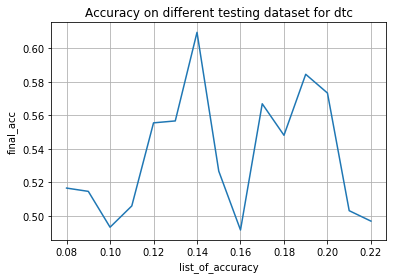

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.536269,0.558099,0.523984
std,0.037094,0.040599,0.053227
min,0.491667,0.450113,0.437868
25%,0.504604,0.551482,0.477664
50%,0.526786,0.575630,0.551442
75%,0.561815,0.577161,0.560187
max,0.609524,0.598682,0.595429


In [14]:
plot(list_of_accuracy,set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for dtc')
grid(True)
show()
df_dtc = {'Accuracy': set_of_accuracy_dtc, 'Precision':set_of_precision_dtc, 'F1 Score':set_of_f1_dtc}
table_dtc = pd.DataFrame(data=df_dtc)
table_dtc
table_dtc.describe()

**Gaussian Naive Bayes**

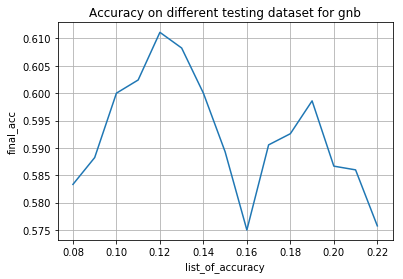

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.592518,0.558099,0.523984
std,0.010762,0.040599,0.053227
min,0.575000,0.450113,0.437868
25%,0.586327,0.551482,0.477664
50%,0.590551,0.575630,0.551442
75%,0.600000,0.577161,0.560187
max,0.611111,0.598682,0.595429


In [15]:
plot(list_of_accuracy,set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for gnb')
grid(True)
show()
df_gnb = {'Accuracy': set_of_accuracy_gnb, 'Precision':set_of_precision_gnb, 'F1 Score':set_of_f1_gnb}
table_gnb = pd.DataFrame(data=df_gnb)
table_gnb
table_gnb.describe()

<B>Comparison of accuracy of all classifier

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'boxes': [<matplotlib.lines.Line2D at 0x7f14326367b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1432636fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f14325f79e8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f14325f76a0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1432636908>,
  <matplotlib.lines.Line2D at 0x7f14325c98d0>]}

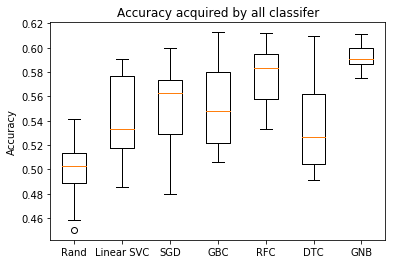

In [16]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,set_of_accuracy,set_of_accuracy_sgd,set_of_accuracy_gbc,set_of_accuracy_rfc,set_of_accuracy_dtc,set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])

<B>Principal Component Analysis (PCA)

In [17]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
pca_set_of_accuracy=[]
pca_set_of_accuracy_sgd=[]
pca_set_of_accuracy_gbc=[]
pca_set_of_accuracy_rfc=[]
pca_set_of_accuracy_gnb=[]
pca_set_of_accuracy_dtc=[]
#############################################List of precision for classifier#########################################################################
pca_set_of_precision = []
pca_set_of_precision_sgd = []
pca_set_of_precision_gbc = []
pca_set_of_precision_rfc = []
pca_set_of_precision_gnb = []
pca_set_of_precision_dtc = []
############################################List of F1 Score for classifier##########################################################################
pca_set_of_f1 = []
pca_set_of_f1_sgd = []
pca_set_of_f1_gbc = []
pca_set_of_f1_rfc = []
pca_set_of_f1_gnb = []
pca_set_of_f1_dtc = []
############################################Train and testing classifer##############################################################################
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_pca = xception.predict(X_train)
    test_features_pca = xception.predict(X_test)
    pca = PCA(n_components=400)
    pca.fit(training_features_pca)
    pca_training_features = pca.fit_transform(training_features_pca)
    pca_test_features=pca.transform(test_features_pca)
    # linear SVC
    clf = Classifier(C=20)
    clf.fit(pca_training_features, y_train)
    y_predict = clf.predict(pca_test_features)
    pca_acc_SVC = clf.score(pca_test_features, y_test)
    pca_set_of_accuracy.append(pca_acc_SVC)
    pca_F1 =f1_score(y_test, y_predict, average='weighted')
    pca_precision = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision.append(pca_precision)
    pca_set_of_f1.append(pca_F1)
#    # SGD
    pca_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    pca_clf_sgd.fit(pca_training_features, y_train)
    y_predict = pca_clf_sgd.predict(pca_test_features)
    pca_acc_sgd = pca_clf_sgd.score(pca_test_features, y_test)
    pca_set_of_accuracy_sgd.append(pca_acc_sgd) 
    pca_F1_sgd =f1_score(y_test, y_predict, average='weighted')
    pca_precision_sgd = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_sgd.append(pca_precision_sgd)
    pca_set_of_f1_sgd.append(pca_F1_sgd)
#     #GBC
    pca_clf_gbc = GradientBoostingClassifier()
    pca_clf_gbc.fit(pca_training_features, y_train)
    y_predict_gbc = pca_clf_gbc.predict(pca_test_features)
    pca_acc_gbc = pca_clf_gbc.score(pca_test_features, y_test)
    pca_set_of_accuracy_gbc.append(pca_acc_gbc) 
    pca_F1_gbc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_gbc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_gbc.append(pca_precision_gbc)
    pca_set_of_f1_gbc.append(pca_F1_gbc)
#     # RFC
    pca_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    pca_rfc_clf.fit(pca_training_features, y_train)
    y_predict_regr = pca_rfc_clf.predict(pca_test_features)
    pca_acc_regr = pca_rfc_clf.score(pca_test_features, y_test)
    pca_set_of_accuracy_rfc.append(pca_acc_regr)
    pca_F1_rfc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_rfc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_rfc.append(pca_precision_rfc)
    pca_set_of_f1_rfc.append(pca_F1_rfc)
#     # NB
    pca_clf_gnb = GaussianNB()
    pca_clf_gnb.fit(pca_training_features, y_train)
    y_predict_gnb = pca_clf_gnb.score(pca_test_features, y_test)
    pca_acc_gbn = pca_clf_gnb.score(pca_test_features, y_test)
    pca_set_of_accuracy_gnb.append(pca_acc_gbn)
    pca_F1_gnb =f1_score(y_test, y_predict, average='weighted')
    pca_precision_gnb = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_gnb.append(pca_precision_gnb)
    pca_set_of_f1_gnb.append(pca_F1_gnb)
#     # DTC
    pca_clf_dtc = DecisionTreeClassifier(random_state=0)
    pca_clf_dtc.fit(pca_training_features, y_train)
    y_predict_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_acc_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_set_of_accuracy_dtc.append(pca_acc_dtc) 
    pca_F1_dtc =f1_score(y_test, y_predict, average='weighted')
    pca_precision_dtc = precision_score(y_test, y_predict, average='weighted')  
    pca_set_of_precision_dtc.append(pca_precision_dtc)
    pca_set_of_f1_dtc.append(pca_F1_dtc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Linear SVC with PCA**

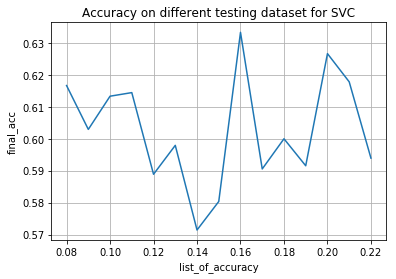

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.602659,0.602382,0.601006
std,0.017392,0.017123,0.017671
min,0.571429,0.571429,0.567175
25%,0.591050,0.592884,0.591248
50%,0.600000,0.599647,0.599008
75%,0.615562,0.615112,0.614271
max,0.633333,0.632695,0.632308


In [18]:
plot(list_of_accuracy,pca_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
pca_df = {'Accuracy': pca_set_of_accuracy, 'Precision':pca_set_of_precision, 'F1 Score':pca_set_of_f1}
pca_table = pd.DataFrame(data=pca_df)
pca_table
pca_table.describe()

**Stochastic Gradient Descent with PCA**

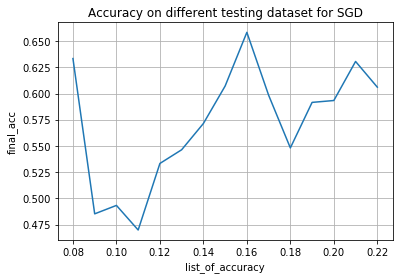

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.571104,0.573336,0.569833
std,0.056959,0.056729,0.058108
min,0.469880,0.477836,0.460068
25%,0.539863,0.542240,0.538456
50%,0.591549,0.594150,0.591792
75%,0.606602,0.610851,0.606892
max,0.658333,0.659375,0.655079


In [19]:
plot(list_of_accuracy,pca_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
pca_df_sgd = {'Accuracy': pca_set_of_accuracy_sgd, 'Precision':pca_set_of_precision_sgd, 'F1 Score':pca_set_of_f1_sgd}
pca_table_sgd = pd.DataFrame(data=pca_df_sgd)
pca_table_sgd
pca_table_sgd.describe()

**Gradient Boasting Classifier with PCA**

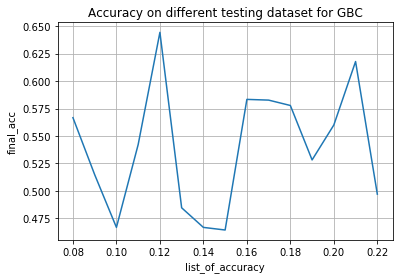

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.539793,0.573336,0.569833
std,0.056949,0.056729,0.058108
min,0.464286,0.477836,0.460068
25%,0.490753,0.542240,0.538456
50%,0.542169,0.594150,0.591792
75%,0.580227,0.610851,0.606892
max,0.644444,0.659375,0.655079


In [20]:
plot(list_of_accuracy,pca_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
pca_df_gbc = {'Accuracy': pca_set_of_accuracy_gbc, 'Precision':pca_set_of_precision_gbc, 'F1 Score':pca_set_of_f1_gbc}
pca_table_gbc = pd.DataFrame(data=pca_df_gbc)
pca_table_gbc
pca_table_gbc.describe()

**Random Forest Classifier with PCA**

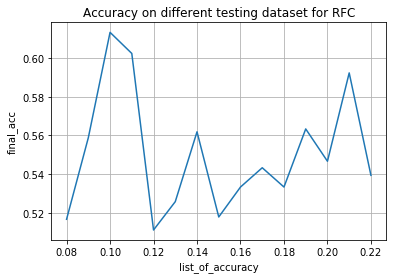

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.550643,0.573336,0.569833
std,0.031523,0.056729,0.058108
min,0.511111,0.477836,0.460068
25%,0.529553,0.542240,0.538456
50%,0.543307,0.594150,0.591792
75%,0.562643,0.610851,0.606892
max,0.613333,0.659375,0.655079


In [21]:
plot(list_of_accuracy,pca_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
pca_df_rfc = {'Accuracy': pca_set_of_accuracy_rfc, 'Precision':pca_set_of_precision_rfc, 'F1 Score':pca_set_of_f1_rfc}
pca_table_rfc = pd.DataFrame(data=pca_df_rfc)
pca_table_rfc
pca_table_rfc.describe()

**Gaussian Naive Bayes with PCA**

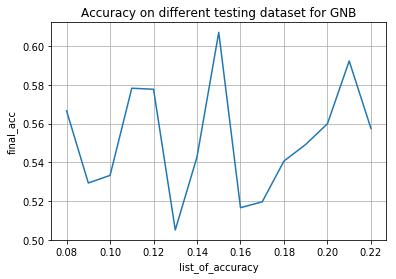

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.551799,0.573336,0.569833
std,0.029154,0.056729,0.058108
min,0.505155,0.477836,0.460068
25%,0.531373,0.542240,0.538456
50%,0.549296,0.594150,0.591792
75%,0.572222,0.610851,0.606892
max,0.607143,0.659375,0.655079


In [22]:
plot(list_of_accuracy,pca_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GNB')
grid(True)
show()
pca_df_gnb = {'Accuracy': pca_set_of_accuracy_gnb, 'Precision':pca_set_of_precision_gnb, 'F1 Score':pca_set_of_f1_gnb}
pca_table_gnb = pd.DataFrame(data=pca_df_gnb)
pca_table_gnb
pca_table_gnb.describe()

**Decision Tree Classifier with PCA**

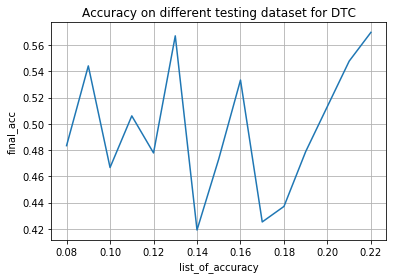

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.496162,0.573336,0.569833
std,0.049165,0.056729,0.058108
min,0.419048,0.477836,0.460068
25%,0.469940,0.542240,0.538456
50%,0.483333,0.594150,0.591792
75%,0.538725,0.610851,0.606892
max,0.569697,0.659375,0.655079


In [23]:
plot(list_of_accuracy,pca_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
pca_df_dtc = {'Accuracy': pca_set_of_accuracy_dtc, 'Precision':pca_set_of_precision_dtc, 'F1 Score':pca_set_of_f1_dtc}
pca_table_dtc = pd.DataFrame(data=pca_df_dtc)
pca_table_dtc
pca_table_dtc.describe()

<B>Comparison of accuracy of all classifier using PCA

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'boxes': [<matplotlib.lines.Line2D at 0x7f1432265ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f143226d400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f143226ddd8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f143226da90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1432265cf8>,
  <matplotlib.lines.Line2D at 0x7f143223fc88>]}

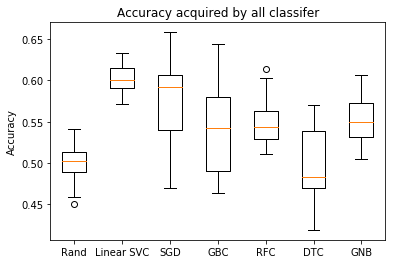

In [24]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,pca_set_of_accuracy,pca_set_of_accuracy_sgd,pca_set_of_accuracy_gbc,pca_set_of_accuracy_rfc,pca_set_of_accuracy_dtc,pca_set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])

**Single Value Decomposition(SVD)**

In [25]:
#########################################################Test Size####################################################################################
list_of_accuracy = np.array([0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22])
##############################################List of accuracy for classifiers########################################################################
svd_set_of_accuracy=[]
svd_set_of_accuracy_sgd=[]
svd_set_of_accuracy_gbc=[]
svd_set_of_accuracy_rfc=[]
svd_set_of_accuracy_gnb=[]
svd_set_of_accuracy_dtc=[]
#############################################List of precision for classifier#########################################################################
svd_set_of_precision = []
svd_set_of_precision_sgd = []
svd_set_of_precision_gbc = []
svd_set_of_precision_rfc = []
svd_set_of_precision_gnb = []
svd_set_of_precision_dtc = []
############################################List of F1 Score for classifier##########################################################################
svd_set_of_f1 = []
svd_set_of_f1_sgd = []
svd_set_of_f1_gbc = []
svd_set_of_f1_rfc = []
svd_set_of_f1_gnb = []
svd_set_of_f1_dtc = []

############################################Train and testing classifer##############################################################################

for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_svd = xception.predict(X_train)
    test_features_svd = xception.predict(X_test)
    svd = TruncatedSVD(n_components=550,n_iter=7)
    svd.fit(training_features_svd)
    svd_training_features = svd.fit_transform(training_features_svd)
    svd_test_features=svd.transform(test_features_svd)
    # linear SVC
    clf = Classifier(C=20)
    clf.fit(svd_training_features, y_train)
    y_predict = clf.predict(svd_test_features)
    svd_acc_SVC = clf.score(svd_test_features, y_test)
    svd_set_of_accuracy.append(svd_acc_SVC)
    svd_F1 =f1_score(y_test, y_predict, average='weighted')
    svd_precision = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision.append(svd_precision)
    svd_set_of_f1.append(svd_F1)
    # SGD
    svd_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
    svd_clf_sgd.fit(svd_training_features, y_train)
    y_predict = svd_clf_sgd.predict(svd_test_features)
    svd_acc_sgd = svd_clf_sgd.score(svd_test_features, y_test)
    svd_set_of_accuracy_sgd.append(svd_acc_sgd)
    svd_F1_sgd =f1_score(y_test, y_predict, average='weighted')
    svd_precision_sgd = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_sgd.append(svd_precision_sgd)
    svd_set_of_f1_sgd.append(svd_F1_sgd)
#     #GBC
    svd_clf_gbc = GradientBoostingClassifier()
    svd_clf_gbc.fit(svd_training_features, y_train)
    y_predict_gbc = svd_clf_gbc.predict(svd_test_features)
    svd_acc_gbc = svd_clf_gbc.score(svd_test_features, y_test)
    svd_set_of_accuracy_gbc.append(svd_acc_gbc)
    svd_F1_gbc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_gbc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_gbc.append(svd_precision_gbc)
    svd_set_of_f1_gbc.append(svd_F1_gbc)
#     # RFC
    svd_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    svd_rfc_clf.fit(svd_training_features, y_train)
    y_predict_regr = svd_rfc_clf.predict(svd_test_features)
    svd_acc_regr = svd_rfc_clf.score(svd_test_features, y_test)
    svd_set_of_accuracy_rfc.append(svd_acc_regr)
    svd_F1_rfc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_rfc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_rfc.append(svd_precision_rfc)
    svd_set_of_f1_rfc.append(svd_F1_rfc)
#     # NB
    svd_clf_gnb = GaussianNB()
    svd_clf_gnb.fit(svd_training_features, y_train)
    y_predict_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_acc_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_set_of_accuracy_gnb.append(svd_acc_gnb)
    svd_F1_gnb =f1_score(y_test, y_predict, average='weighted')
    svd_precision_gnb = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_gnb.append(svd_precision_gnb)
    svd_set_of_f1_gnb.append(svd_F1_gnb)
#     # DTC
    svd_clf_dtc = DecisionTreeClassifier(random_state=0)
    svd_clf_dtc.fit(svd_training_features, y_train)
    y_predict_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_acc_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_set_of_accuracy_dtc.append(svd_acc_dtc) 
    svd_F1_dtc =f1_score(y_test, y_predict, average='weighted')
    svd_precision_dtc = precision_score(y_test, y_predict, average='weighted')  
    svd_set_of_precision_dtc.append(svd_precision_dtc)
    svd_set_of_f1_dtc.append(svd_F1_dtc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Liner SVC with SVD**

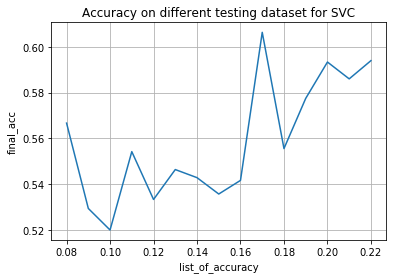

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.558856,0.561075,0.557429
std,0.026882,0.026638,0.027552
min,0.520000,0.525210,0.517436
25%,0.538690,0.540802,0.537237
50%,0.554217,0.554896,0.554476
75%,0.581726,0.587964,0.581726
max,0.606299,0.605217,0.603329


In [26]:
plot(list_of_accuracy,svd_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()
svd_df = {'Accuracy': svd_set_of_accuracy, 'Precision':svd_set_of_precision, 'F1 Score':svd_set_of_f1}
svd_table = pd.DataFrame(data=svd_df)
svd_table
svd_table.describe()

**Stochastic Gradient Descent with SVD**

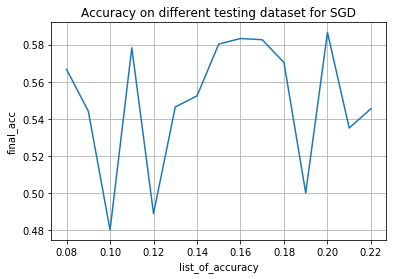

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.549377,0.551567,0.525788
std,0.035220,0.044003,0.059378
min,0.480000,0.442759,0.405678
25%,0.539575,0.527678,0.486008
50%,0.552381,0.557778,0.542089
75%,0.579335,0.585890,0.575928
max,0.586667,0.601278,0.585477


In [27]:
plot(list_of_accuracy,svd_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()
svd_df_sgd = {'Accuracy': svd_set_of_accuracy_sgd, 'Precision':svd_set_of_precision_sgd, 'F1 Score':svd_set_of_f1_sgd}
svd_table_sgd = pd.DataFrame(data=svd_df_sgd)
svd_table_sgd
svd_table_sgd.describe()

**Gradient Boasting Classifier with SVD**

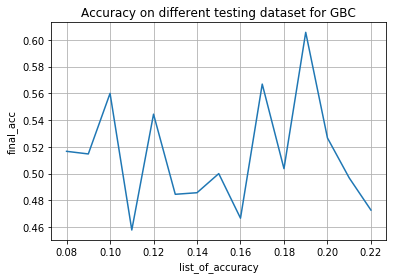

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.513536,0.551567,0.525788
std,0.041205,0.044003,0.059378
min,0.457831,0.442759,0.405678
25%,0.485125,0.527678,0.486008
50%,0.503704,0.557778,0.542089
75%,0.535556,0.585890,0.575928
max,0.605634,0.601278,0.585477


In [28]:
plot(list_of_accuracy,svd_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()
svd_df_gbc = {'Accuracy': svd_set_of_accuracy_gbc, 'Precision':svd_set_of_precision_gbc, 'F1 Score':svd_set_of_f1_gbc}
svd_table_gbc = pd.DataFrame(data=svd_df_gbc)
svd_table_gbc
svd_table_gbc.describe()

**Random Forest Classifier with SVD**

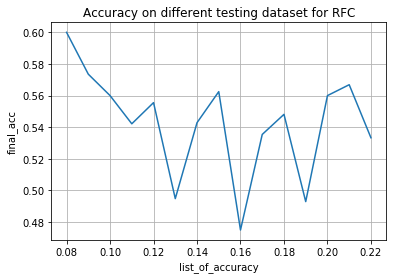

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.542880,0.551567,0.525788
std,0.033265,0.044003,0.059378
min,0.475000,0.442759,0.405678
25%,0.534383,0.527678,0.486008
50%,0.548148,0.557778,0.542089
75%,0.561250,0.585890,0.575928
max,0.600000,0.601278,0.585477


In [29]:
plot(list_of_accuracy,svd_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()
svd_df_rfc = {'Accuracy': svd_set_of_accuracy_rfc, 'Precision':svd_set_of_precision_rfc, 'F1 Score':svd_set_of_f1_rfc}
svd_table_rfc = pd.DataFrame(data=svd_df_rfc)
svd_table_rfc
svd_table_rfc.describe()

**Gaussian Naive Bayes with SVD**

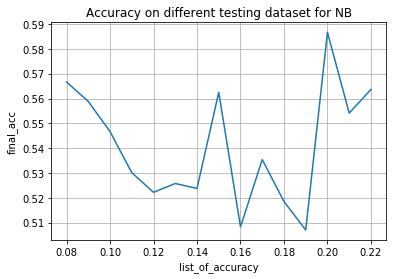

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.540690,0.551567,0.525788
std,0.023897,0.044003,0.059378
min,0.507042,0.442759,0.405678
25%,0.523016,0.527678,0.486008
50%,0.535433,0.557778,0.542089
75%,0.560662,0.585890,0.575928
max,0.586667,0.601278,0.585477


In [30]:
plot(list_of_accuracy,svd_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for NB')
grid(True)
show()
svd_df_gnb = {'Accuracy': svd_set_of_accuracy_gnb, 'Precision':svd_set_of_precision_gnb, 'F1 Score':svd_set_of_f1_gnb}
svd_table_gnb = pd.DataFrame(data=svd_df_gnb)
svd_table_gnb
svd_table_gnb.describe()

**Decision Tree Classifier with SVD**

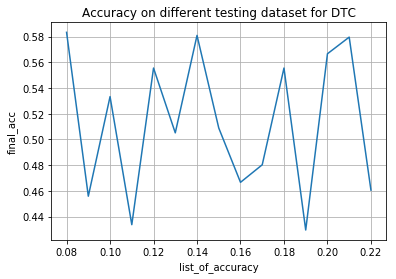

,Accuracy,Precision,F1 Score
count,15.000000,15.000000,15.000000
mean,0.513059,0.551567,0.525788
std,0.055717,0.044003,0.059378
min,0.429577,0.442759,0.405678
25%,0.463636,0.527678,0.486008
50%,0.508929,0.557778,0.542089
75%,0.561111,0.585890,0.575928
max,0.583333,0.601278,0.585477


In [31]:
plot(list_of_accuracy,svd_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()
svd_df_dtc = {'Accuracy': svd_set_of_accuracy_dtc, 'Precision':svd_set_of_precision_dtc, 'F1 Score':svd_set_of_f1_dtc}
svd_table_dtc = pd.DataFrame(data=svd_df_dtc)
svd_table_dtc
svd_table_dtc.describe()

**Linear SVC classifier graph for Normal , PCA and SVD**

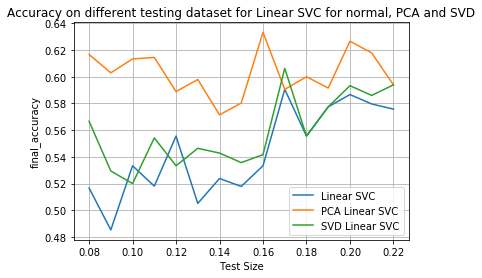

In [32]:
import pylab 
plot(list_of_accuracy,set_of_accuracy,label = 'Linear SVC')
plot(list_of_accuracy,pca_set_of_accuracy,label = 'PCA Linear SVC')
plot(list_of_accuracy,svd_set_of_accuracy, label = 'SVD Linear SVC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Linear SVC for normal, PCA and SVD')
grid(True)

**Stochastic Gradient Descent with PCA classifier for Normal , PCA and SVD**

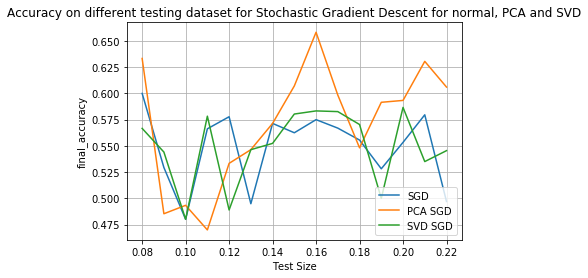

In [33]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_sgd,label = 'SGD')
plot(list_of_accuracy,pca_set_of_accuracy_sgd,label = 'PCA SGD')
plot(list_of_accuracy,svd_set_of_accuracy_sgd, label = 'SVD SGD')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Stochastic Gradient Descent for normal, PCA and SVD')
grid(True)

**Gradient Boasting Classifier for Normal,PCA and SVD**

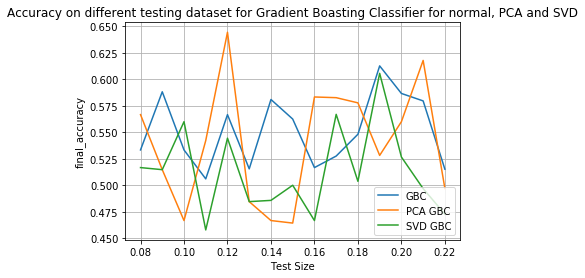

In [34]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_gbc,label = 'GBC')
plot(list_of_accuracy,pca_set_of_accuracy_gbc,label = 'PCA GBC')
plot(list_of_accuracy,svd_set_of_accuracy_gbc, label = 'SVD GBC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Gradient Boasting Classifier for normal, PCA and SVD')
grid(True)

**Random Forest Classifier for Normal,PCA and SVD**

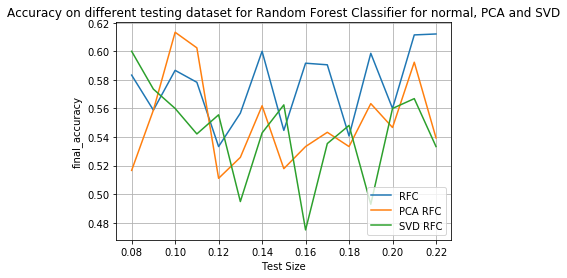

In [35]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_rfc,label = 'RFC')
plot(list_of_accuracy,pca_set_of_accuracy_rfc,label = 'PCA RFC')
plot(list_of_accuracy,svd_set_of_accuracy_rfc, label = 'SVD RFC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Random Forest Classifier for normal, PCA and SVD')
grid(True)

**Gaussian Naive Bayes classifier for Normal,PCA and SVD**

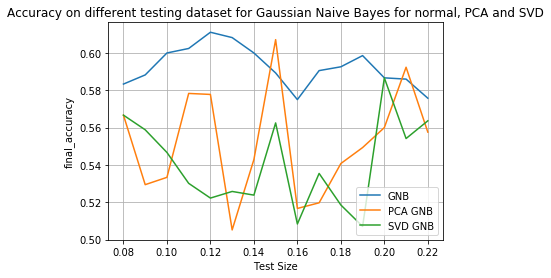

In [36]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_gnb,label = 'GNB')
plot(list_of_accuracy,pca_set_of_accuracy_gnb,label = 'PCA GNB')
plot(list_of_accuracy,svd_set_of_accuracy_gnb, label = 'SVD GNB')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for Gaussian Naive Bayes for normal, PCA and SVD')
grid(True)

**Decision Tree Classifier for Normal,PCA and SVD**

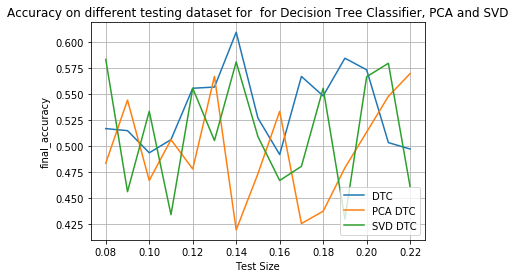

In [37]:
import pylab 
plot(list_of_accuracy,set_of_accuracy_dtc,label = 'DTC')
plot(list_of_accuracy,pca_set_of_accuracy_dtc,label = 'PCA DTC')
plot(list_of_accuracy,svd_set_of_accuracy_dtc, label = 'SVD DTC')
xlabel('Test Size')
ylabel('final_accuracy')
pylab.legend(loc='lower right')
title('Accuracy on different testing dataset for  for Decision Tree Classifier, PCA and SVD')
grid(True)

<B>Comparison of accuracy of all classifier using SVD

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'boxes': [<matplotlib.lines.Line2D at 0x7f1431c4efd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1431bd87f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1431be2208>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1431bd8e80>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1431bd8160>,
  <matplotlib.lines.Line2D at 0x7f1431bb30b8>]}

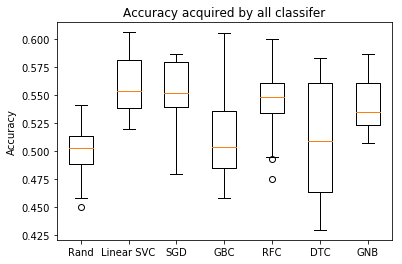

In [38]:
fig = plt.figure()
ylabel('Accuracy')
title('Accuracy acquired by all classifer')
ax = fig.add_subplot(111)
ax.boxplot([accuracy,svd_set_of_accuracy,svd_set_of_accuracy_sgd,svd_set_of_accuracy_gbc,svd_set_of_accuracy_rfc,svd_set_of_accuracy_dtc,svd_set_of_accuracy_gnb], labels=['Rand','Linear SVC', 'SGD','GBC','RFC','DTC','GNB'])